In [6]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from sklearn.datasets import load_boston

boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [8]:
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
df = pd.concat([dfX, dfy], axis=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [10]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Q1. 원하는 변수를 2개 이상을 가지고 'price' 예측하는 모델 만들기

#### sckit-learn 활용, R^2/MSE 계산

In [11]:
X=df.loc[:,['CRIM','LSTAT']]
y=df.loc[:,'MEDV']

In [12]:
rl=LinearRegression()
rl.fit(X,y)

LinearRegression()

In [13]:
y_hat=rl.predict(X)
print(f'R^2:{rl.score(X,y):.4f}')
print(f'MSE:{mean_squared_error(y,y_hat):.4f}')

R^2:0.5476
MSE:38.1926


## Q2. (같은 독립변수를 사용) Data pre-processing 등을 활용하여 앞의 모델보다 성능 높이기(MSE 기준), 왜 성능이 높아졌는지 간단하게 서술

#### outlier 제거(그림 그려서 확인하면 쉽게 확인 가능) 의 방법 존재

In [14]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


<AxesSubplot:>

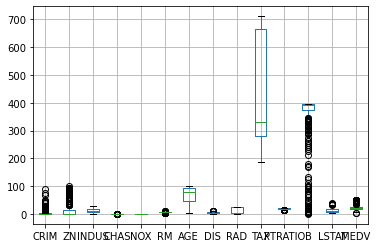

In [15]:
df.boxplot()

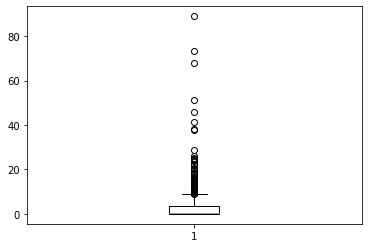

In [16]:
crim_bp=plt.boxplot(df['CRIM'])	

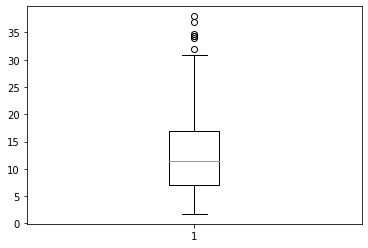

In [17]:
lstat_bp=plt.boxplot(df['LSTAT'])

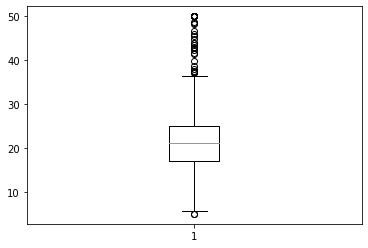

In [18]:
medv_bp=plt.boxplot(df['MEDV'])

In [19]:
idx = (df['LSTAT']<30) & (df['CRIM']<8) & (df['MEDV']<40)
df_1 = df.loc[idx,:]
df_1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


#### 이상치 제거 결과:
 - 506 rows가 399rows로 줄어들었다.

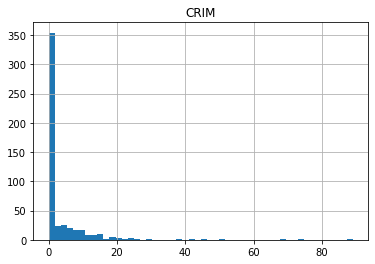

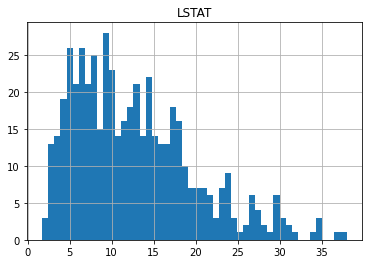

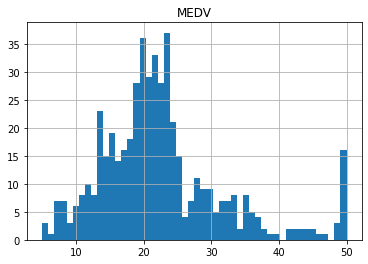

In [20]:
hist1=df.hist(['CRIM'],bins=50)
hist2=df.hist(['LSTAT'],bins=50)
hist3=df.hist(['MEDV'],bins=50)

In [21]:
def print_summary(model, X, y, features, plot= False):
    s = pd.DataFrame({'coefficients':model.coef_})
    s.index = features
    print(s)
    print()
    if plot:
        s.plot(kind= 'barh')
        plt.show()
    
    print(f'절편: {model.intercept_:.4f}')
    print(f'R^2: {model.score(X,y):.4f}')
    y_hat = model.predict(X)
    print(f'MSE: {mean_squared_error(y_hat,y):.4f}')

In [22]:
XX=df_1.loc[:,['CRIM','LSTAT']]
yy=df_1.loc[:,'MEDV']

In [32]:
X_train,X_test,y_train,y_test=train_test_split(XX,yy,test_size=0.2)
rl_1=LinearRegression()
rl_1.fit(X_train,y_train)

yy_train_pred=rl_1.predict(X_train)
yy_test_pred=rl_1.predict(X_test)

#print(yy_train_pred)
#print(yy_test_pred)

print("========Train Data=======")
print_summary(rl_1,X_train,y_train,features=['CRIM','LSTAT'])
print("\n========Test Data=======")
print_summary(rl_1,X_test,y_test,features=['CRIM','LSTAT'])

========Train Data=======
       coefficients
CRIM       -0.35737
LSTAT      -0.70860

절편: 31.1044
R^2: 0.5189
MSE: 17.8094

========Test Data=======
       coefficients
CRIM       -0.35737
LSTAT      -0.70860

절편: 31.1044
R^2: 0.5516
MSE: 13.0625


***
1. 이상치 제거 안했을 때,
    - R^2:0.5476
    - MSE:38.1926
<br>
<br>
2. 이상치 제거 했을 때,
    - Train Data<br>
      R^2: 0.5189<br>
      MSE: 17.8094<br>
      <br>
    - Test Data<br>
      R^2: 0.5516<br>
      MSE: 13.0625<br>
    
__결과: 이상치 제거 전후로 MSE가 train과 test 모두가 줄어들었다.__
<br>
<br>
__줄어든 이유__: 이상치를 제거하였으므로 오차 제곱합이 작아지기 때문이다.
CRIM변수에 대해서 이상치 제거할 시 10을 기준으로 했을 때는 MSE가 큰 변화는 없었지만,
또한 타켓변수도 동일하게 이상치를 제거할 때, MSE 성능이 더욱 좋아졌다.
그리고 train case의 MSE보다 test case의 MSE가 더 줄어든 것을 볼 수 있다.
그리고 이상치 제거 전의 R계수보다 이상치 제거 후 test case의 R계수가 증가한 것도 볼 수 있다.

### 특정한 정답은 없으며, 문제가 원하는 답변에 충족하면 만점 처리

[참고자료]   
https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python  
https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard